# 데이터 준비 (크롤링)

In [1]:
from bs4 import BeautifulSoup
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 리뷰 크롤링해오는 함수 정의
def get_reviews(target_url, reviews):
    reviews_url = '&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='

    '''
    # 전체 리뷰 가져오고 싶으면 이렇게!
    count = int(soup.find('div', {'class': 'score_total'}).find('em').text.replace(',', ''))

    page_count = count // 10
    if count % 10 > 0:
        page_count += 1
    '''
    # 너무 많으니까 50페이지만 가져와야징
    page_count = 50

    for i in range(1, page_count + 1):
        url = '%s%s%d' % (target_url, reviews_url, i)
        response = requests.get(url=url)
        soup = BeautifulSoup(response.text, 'html.parser')
        score_result = soup.find('div', {'class': 'score_result'})
        lis = score_result.findAll('li')

        for li in lis:
            reviews.append(li.find('p').findAll('span')[-1].text.replace('\r','').replace('\n','').replace('\t',''))

In [3]:
bando_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=185917'
bando_reviews = []
get_reviews(bando_url, bando_reviews)
print(bando_reviews[0:3])

['부산행 반도 못따라감 그래서 반도임 ', '재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 감동은 빼주셨으면 ', '영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다 ']


In [4]:
live_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=189537'
live_reviews = []
get_reviews(live_url, live_reviews)
print(live_reviews[0:3])

['개연성 진짜....할 말 없음 ', '영화보다 중간에 나온적은 처음~ 저런좋은배우를 가지고 이따구영화를 만들다니ㅜㅜ ', '유아인 그 똑똑한 배우가 왜 이런 영화를 택한건지 좀 의문이에요.. ']


In [5]:
aladdin_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=163788'
aladdin_reviews = []
get_reviews(aladdin_url, aladdin_reviews)
print(aladdin_reviews[0:3])

['윌 스미스가 하드캐리하여 의도치 않게 원작을 뛰어넘은 실사영화 ', '영화가 너무 아름답다..ost도 잊혀지지 안고 디즈니 실사중에서 최고중에 최고다 쟈스민 너무 멋지고 팬 엄청나게 생길듯 웃다가 울다가 너무 좋았음 ', '존잼임... 난 처음 도입부에 아~라~비안 나~잇 이 부분에서부터 감동받아서 울 뻔했음... ']


In [6]:
showman_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=106360'
showman_reviews = []
get_reviews(showman_url, showman_reviews)
print(showman_reviews[0:3])

['말이 필요없음. 이런걸 영화라고 함. ', '레미제라블이후로 휴잭맨의인생영화였다 ', '휴잭맨의. 매력이 한껏 돋보인 영화입니다.다른 출연자들도 너무 멋지구요.사람은 누구나 소중하며, 현재를 멋지게 사는게 중요하다는 메세지도 있구요.좋았습니다 ']


## csv 파일로 저장해보기

In [7]:
'''
이 방법은 잘 안됐음 다음에 써보기...
def write_csv(filename, data):
    file_path = './' + filename + '.csv'
    
    csvfile = open(file_path, 'w', newline='')
    
    csvwriter = csv.writer(csvfile)
    for row in data:
        csvwriter.writerow(row)
        
    csvfile.close()
    
write_csv('bando', bando_reviews)
'''

"\n이 방법은 잘 안됐음 다음에 써보기...\ndef write_csv(filename, data):\n    file_path = './' + filename + '.csv'\n    \n    csvfile = open(file_path, 'w', newline='')\n    \n    csvwriter = csv.writer(csvfile)\n    for row in data:\n        csvwriter.writerow(row)\n        \n    csvfile.close()\n    \nwrite_csv('bando', bando_reviews)\n"

In [8]:
bando_df = pd.DataFrame(bando_reviews)
bando_df

,0
0,부산행 반도 못따라감 그래서 반도임
1,재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 ...
2,영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다
3,진짜 재미없음 다른말필요없음
4,미안하지만 jane 명찰보고 빵터짐
...,...
495,역시 좀비물은 실망 시키지 않아요~~~다들 연기 왜이리 잘 하죠? 전 재밌게 봤습니다
496,좀비보다 사람이 더 무섭다는 걸 보여주는 최고의 영화
497,"재미나게 잘 봤습니다. 근데 평점이 다들 박하네요… 매드맥스, 워킹데드에서 본듯한 ..."
498,해효 형님 아무것도 안해효ㅠㅠ


In [9]:
bando_df.to_csv('./bando.csv', index=False, header=False, encoding='utf-8-sig')

In [10]:
live_df = pd.DataFrame(live_reviews)
live_df.to_csv('./live.csv', index=False, header=False, encoding='utf-8-sig')

In [11]:
aladdin_df = pd.DataFrame(aladdin_reviews)
aladdin_df.to_csv('./aladdin.csv', index=False, header=False, encoding='utf-8-sig')

In [12]:
showman_df = pd.DataFrame(showman_reviews)
showman_df.to_csv('./showman.csv', index=False, header=False, encoding='utf-8-sig')

# 워드 클라우드

In [13]:
'''
!pip install wordcloud
'''
# 위에 데이터 없다 치고 csv 파일에서 읽어보기
import pandas as pd
df = pd.read_csv('./aladdin.csv', header=None, encoding='utf-8')
df

,0
0,윌 스미스가 하드캐리하여 의도치 않게 원작을 뛰어넘은 실사영화
1,영화가 너무 아름답다..ost도 잊혀지지 안고 디즈니 실사중에서 최고중에 최고다 쟈...
2,존잼임... 난 처음 도입부에 아~라~비안 나~잇 이 부분에서부터 감동받아서 울 뻔...
3,자스민의 speechless 명장면이고 덤으로 윌 스미스의 연기력 또한 매우 굿~~
4,A whole new world 나올때때 개소름...
...,...
495,믿기 어렵겠지만 노래가 좋아서 울었어요ㅡㅡ 우리신랑이 왜 우냐고ㅋㅋ 감동했으니까!!!
496,이거 안보면 겸상안함 진짜 모든 다즈니 작품중 개명작왜 쓰리디 안해줘여 엉엉 솔직히...
497,명작의 실사화라 걱정했는데 정말 역대급...완전 재미있었어요!! 디테일을 새로 추가...
498,영화 넘 아름답다....♡♡♡퀄리티두 넘 좋고 거짓으로 인생을 살면 안 된다는 좋은...


In [14]:
al_reviews = df[0].values
al_reviews

array(['윌 스미스가 하드캐리하여 의도치 않게 원작을 뛰어넘은 실사영화 ',
       '영화가 너무 아름답다..ost도 잊혀지지 안고 디즈니 실사중에서 최고중에 최고다 쟈스민 너무 멋지고 팬 엄청나게 생길듯 웃다가 울다가 너무 좋았음 ',
       '존잼임... 난 처음 도입부에 아~라~비안 나~잇 이 부분에서부터 감동받아서 울 뻔했음... ',
       '자스민의 speechless 명장면이고 덤으로 윌 스미스의 연기력 또한 매우 굿~~ ',
       'A whole new world 나올때때 개소름... ', '자스민 존나 이쁘다.. ',
       '지니가 나오면.. 이세상 흥이 아니다ㅎ ',
       '일요일 아침 8시 디즈니 만화동산 챙겨보고 비디오 알라딘 애니도 수십번 빌려봐서 테이프 늘어났었는데 ㅎㅎ클린액으로 비디오 헤드 청소해보신분 손! ',
       '디즈니가 미쳤음.. 영화시장을 통재로 잡아먹으려고 작정을함..끝내주는 영화 이제껏 디즈니실사중 최고였음 ',
       '제일 우려스러웠던 윌스미스가 하드캐리하는바람에 원작 뛰어넘어버림 ㅋㅋㅋ ',
       '2시간동안 동화에 들어갔다 나온 기분..  Ost는 정말 언제들어도 벅차고 감동스럽네요ㅠㅠ 디즈니 최고!! ',
       '실사화를 이렇게 완벽히 할 수 있나 진짜 환상적이다 ',
       '자스민 공주가 자팡에게 격분하며 공주로서 위엄을 보일때 나오는 speechless 음악이 압권이었습니다. 이 때의 자스민 모습이란 이미 술탄이었죠. 영화제목을 자스민이라고 해도 될 정도로 나오미스캇이 너무나 반짝이고...',
       '알라딘에게도 자스민에게도 왕자는 필요없어 ',
       '진짜 잠시나마 갓스미스님 의심했던게 넘 후회되네요ㅜ 일케 큰영화를 혼자 씹고 삼키고 다하십니다ㅎ자스민은 진정한 진흙속의보석인듯 걍가수네요 심하게 예쁜건 입아프고 가이리치는 이제 날개달듯ㅋ 지리는 감독입니다 영화진짜 ...',
       '색감도 노래도 너무 화려하고 

In [15]:
from konlpy.tag import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭 영화"
stop_words = stop_words.split(' ')
stop_words[0:10]

# 불용어 제거
nouns = []
for post in al_reviews:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            nouns.append(noun)

# 명사 10개만 출력해보기
nouns[0:10]

['윌', '스미스', '하드', '캐리', '의도', '원작', '실사', '디즈니', '실사', '최고']

In [16]:
from collections import Counter

# 제일 많이 나온 단어 100개만 가져오고 몇번 나왔는지도 셀거예여
num_top_nouns = 100
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))

print(top_nouns)

{'알라딘': 96, '디즈니': 74, '최고': 65, '자스민': 61, '노래': 61, '번': 58, '실사': 48, '윌스미스': 47, '감동': 39, '지니': 37, '거': 32, '생각': 31, '나': 29, '눈': 28, '시간': 27, '음악': 26, '연기': 26, '기대': 26, '공주': 25, '행복': 24, '소름': 23, '배우': 22, '원작': 19, '잼': 18, '말': 18, '줄': 18, '인생': 18, '스미스': 17, '쟈스민': 17, '듯': 17, '장면': 17, '내': 17, '캐스팅': 17, '이상': 17, '윌': 16, '눈물': 16, '귀': 16, '캐리': 15, '처음': 15, '게': 15, '사람': 15, '속': 14, '영상미': 14, '스토리': 14, '하드': 13, '정도': 13, '나오미': 13, '완벽': 13, '굿': 12, '분': 12, '동화': 12, '걱정': 12, '양탄자': 12, '춤': 12, '대박': 11, '뮤지컬': 11, '느낌': 11, '팬': 10, '존': 10, '기분': 10, '미녀': 10, '야수': 10, '평점': 10, '매력': 10, '추억': 10, '끝': 10, '여주': 10, '동안': 9, '건': 9, '걸': 9, '이거': 9, '동심': 9, '아이': 9, '점': 9, '판': 8, '여자': 8, '아부': 8, '개인': 8, '우리': 8, '강추': 8, '하나': 8, '재미': 8, '호강': 8, '이건': 8, '기생충': 8, '추천': 8, '마음': 8, '애': 8, '애니': 7, '후회': 7, '배': 7, '알리': 7, '역할': 7, '돈': 7, '스콧': 7, '캐릭터': 7, '아라비안': 7, '주인공': 7, '짱': 7, '작품': 7}


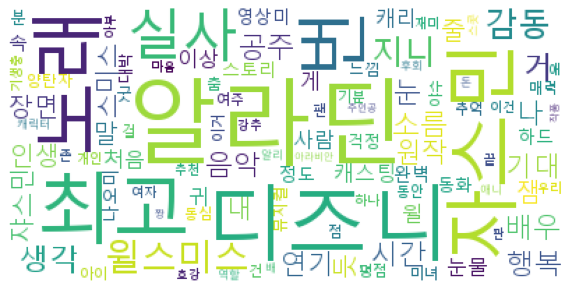

In [17]:
# 위에서 센 제일 많이 나온 단어 가지고 워드 클라우드 그리기
from wordcloud import WordCloud
wc = WordCloud(background_color="white", font_path='./font/malgun.ttf')
wc.generate_from_frequencies(top_nouns)

figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

## BoW

In [18]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 단어 사전 만들기!
bow = ['개연', '배우', '최악', '연기', '스토리', '실사', '최고', '음악', '노래', '감동', '생각', '인물']
sentence = ' '.join(bow)

sentences = []
sentences.append(sentence)

# 1글자도 인식이 되도록 토큰 패턴 변경
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
cv.fit(sentences)

print(cv.vocabulary_)

{'개연': 1, '배우': 3, '최악': 11, '연기': 7, '스토리': 5, '실사': 6, '최고': 10, '음악': 8, '노래': 2, '감동': 0, '생각': 4, '인물': 9}


In [19]:
# CountVectorizer로 변환
def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
    sentence = " ".join(tokens)
    
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector

In [20]:
# 위에 크롤링해왔던 문자열 리스트를 쭉 이어서 문자열 하나로 만들기
al_text = ' '.join(al_reviews)
bando_text = ' '.join(bando_reviews)
live_text = ' '.join(live_reviews)
showman_text= ' '.join(showman_reviews)

# 그거 가지고 분석 해보기
print(convert_cv(al_text, cv))
print(convert_cv(bando_text, cv))
print(convert_cv(live_text, cv))
print(convert_cv(showman_text, cv))

[[39  1 62 25 31 14 30 26 26  1 59  1]]
[[38 24  1 23 25 55  0 38  3  6  3 16]]
[[10 74  1 53 16 59  0 56  0  2  0 40]]
[[48  3 83 17 39 33  0 15 34 16 80  4]]


In [21]:
# cos 유사도 계산해보기
from sklearn.metrics.pairwise import cosine_similarity

# 알라딘 리뷰와 반도 리뷰의 유사도는 어떻게 나오지?
cosine_sim1 = cosine_similarity(convert_cv(al_text, cv), convert_cv(bando_text, cv))

# 알라딘 리뷰와 쇼맨 리뷰의 유사도는 어떻게 나오지?
cosine_sim2 = cosine_similarity(convert_cv(al_text, cv), convert_cv(showman_text, cv))

print(cosine_sim1)
print(cosine_sim2)

[[0.48929078]]
[[0.93902791]]


## TF-IDF EX2 따라해보기

In [22]:
# 데이터 프레임을 만들기 위해 일단 리스트 형태로 가공
# 각 리뷰가 어떤 영화 리뷰인지 라벨 달아주는거
data = []

labels = [['Bando', bando_reviews], ['Live', live_reviews], ['Aladdin', al_reviews], ['Showman',showman_reviews]]

for label in labels:
    
    for review in label[1]:
        data.append([label[0], review])

data

[['Bando', '부산행 반도 못따라감 그래서 반도임 '],
 ['Bando', '재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 감동은 빼주셨으면 '],
 ['Bando', '영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다 '],
 ['Bando', '진짜 재미없음 다른말필요없음 '],
 ['Bando', '미안하지만 jane 명찰보고 빵터짐 '],
 ['Bando', '실망대망.  교과서적 연출로도 평타 이상은 가능할 좀비소재를 이렇게까지... '],
 ['Bando',
  '한창 때리고 부수고 싸우는 거 좋아하는 10세 남아 머리에서 나올법한  수준 낮은 각본과 연출. 대신 추진력 하나는 인정. 이런 지지고 볶는 짜파게티같은 각본을 완결짓고 영화판에 내다니..그 점은 대단! 애기들도 연...'],
 ['Bando',
  '분노의 질주를 본것 같았다...감동을 억지로 씬에 담으려는거 같았고현실성 없는 내용들이 많이 깔려있어서보는내내 이질감이 느껴져 2점 드렸습니다. '],
 ['Bando',
  '기아 모하비 홍보영상을 보고나온 느낌이 제일 강하게 들었고,차량 액션신은 대부분 cg인데 이질감이 느껴짐좀비 연출은 죄다 때거지로 덤비는 연출 아쉬움그냥 볼만한 수준의 영화이 영화보다 부산행 한 번 더 보는걸 추천드...'],
 ['Bando', '부산행의 반도 못하다 해서 반도. . 인가.. '],
 ['Bando', '강동원 이정현은 아묻따였는데 악역으로 나온 구교환 너무 좋아ㅠ '],
 ['Bando', '기대안하고 봐서 그런지 재미없었음 ^^ 기대하고 봤으면 더 재미없었을듯 '],
 ['Bando', '이것은 좀비영화인가 레이싱영화인가 신파는 왜이리 많은것인가 '],
 ['Bando', '이거 볼 돈으로 국밥 특대 사드세여 ㅎㅎ '],
 ['Bando', '추천은 안함 근데 강동원 잘생김강동원 총 잘쏨 근데 강동원 잘생김 여자애 운전 개쩜 근데 강동원 잘생김 '],
 ['Bando', ' 엔딩크레딧

In [23]:
# 위에서 만든 리스트로 데이터 프레임 만들기
reviews_df = pd.DataFrame(data, columns=['title', 'reviews'])
reviews_df

,title,reviews
0,Bando,부산행 반도 못따라감 그래서 반도임
1,Bando,재미있게 잘 봤습니다. 다만 조금 질질 끄는 게 아쉬웠어요. 전형적인 약간의 억지 ...
2,Bando,영상미는 좋은데 스토리가....흥미가 안생겨요배우님들 고생 많았습니다
3,Bando,진짜 재미없음 다른말필요없음
4,Bando,미안하지만 jane 명찰보고 빵터짐
...,...,...
1992,Showman,노래가 살린영화 스토리나 소재는 별로
1993,Showman,인종차별을 돈벌이로 이용한 백인남성을 미화한 영화.이 영화에서 사회적소수자는 뒤로 ...
1994,Showman,뭐 인생영화? 태어나서 첫영화라면 이해한다.라라랜드보다 좋다고 누가 그랬냐. 엎드려...
1995,Showman,개 쓰레기같은영화. 역겹다. 중간쯤부터 눈살이 찌푸려진다. 개연성없는 스토리전개. ...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환
tf_idf = TfidfVectorizer()
tf_idf_matrix = tf_idf.fit_transform(reviews_df['reviews'])

# (데이터의 개수, 단어의 개수)
print(tf_idf_matrix.shape)

(1997, 11500)


In [25]:
from sklearn.metrics.pairwise import linear_kernel

# tf-idf의 코사인 유사도는 그냥 내적을 구하는거여서 linear_kernel을 사용한다.
# 400 x 400을 서로 내적하여 코사인 유사도를 구함
cosine_sim = linear_kernel(tf_idf_matrix, tf_idf_matrix)

print(cosine_sim.shape)

# 각 항목은 영화 리뷰 간의 유사도를 나타냄
# 첫번째 영화 리뷰와 본인 포함 400개 리뷰의 유사도 확인해보기
# 첫번째는 자기 자신이니까 1이고... 0이 엄청 많네?
print(cosine_sim[0])

(1997, 1997)
[1. 0. 0. ... 0. 0. 0.]


In [107]:
# 유사한 리뷰를 구함
def get_similar(index, cosine_sim):
    # 해당 영화의 유사도를 배열로 변환
    # 0 : 인덱스, 1 : 유사도
    scores = list(enumerate(cosine_sim[index]))

    # 유사도(x[1] 항목)를 기준으로 높은 순으로 정렬
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # 가장 유사도가 높은 자신을 제외하고 5개를 추출
    scores = scores[1:6]
    
    # 인덱스를 구함
    indices = [x[0] for x in scores]
    #print(indices)
    # 각 인덱스의 영화 제목이랑 리뷰 내용을 구함
    reviews = reviews_df.iloc[indices]
    
    # 각 리뷰들의 코사인 유사도도 붙여서 보여주기 
    # (매개변수로 넘겨받은 영화 리뷰 기준 유사도) 
    reviews['cosine_sim'] = [x[1] for x in scores]
    
    return reviews

In [115]:
# 아무 리뷰나 선택
sample = reviews_df.sample()
sample

,title,reviews
693,Live,알바 거르고 이게 재밌었다는 사람 진짜 부럽다. 매사에 사춘기 여고생마냥 행복한 감...


In [118]:
# 위에서 고른 리뷰랑 제일 비슷한 5개 뭐야?
get_similar(sample.index[0], cosine_sim)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,reviews,cosine_sim
1362,Aladdin,사춘기 딸이 두번 보았습니다.,0.155816
97,Bando,진짜 너무하네 이게 영화냐,0.121939
1870,Showman,이게 완벽한 영화...,0.121857
358,Bando,이게 왠 분노의질주???,0.110187
421,Bando,아따 평점 알바 겁나 풀었구마잉,0.097966


## Word2Vec

In [30]:
from gensim.models import word2vec

results = []
twitter = Okt()

reviews = reviews_df['reviews'].values

for review in reviews:
    malist = twitter.pos(review, norm=True, stem=True)
    
    r = []
    
    for word in malist :
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
print(results)

['부산 행 반도 못 따라가다 그래서 반도 임', '재미있다 자다 보다 다만 조금 질질 끄다 게 아쉽다 전형 적 약간 억지 감동 빼다', '영 상미 좋다 스토리 흥미 안생겨요 배우 님 들다 고생 많다', '진짜 재미없다 다른 말 필요없다', '미안하다 jane 명찰 보고 빵터지다', '실망 대망 교과서 적 연출 도 평타 이상은 가능하다 좀비 소재 이렇게', '한창 때리다 부수 싸우다 거 좋아하다 10 세 남아 머리 나오다 법 수준 낮다 각본 연출 대신 추진 력 하나 인정 이렇다 지지 볶다 짜파게티 같다 각본 완결 짓다 영 화판 내다 그 점 대다 애기 들 연', '분노 질주 보다 같다 감동 억지로 씬 담다 거 같다 현실 성 없다 내용 들 많이 깔다 보다 이 질감 느껴지다 2 점 드리다', '기아 모하비 홍보 영상 보고 나오다 느낌 제일 강하다 들다 차량 액션 신다 대부분 cg 이 질감 느껴지다 좀비 연출 죄다 때 거지 덤비다 연출 아쉬움 그냥 볼 만 수준 영화 이 영화 부산 행 하다 번 더 보다 추천 드', '부산 행 반도 못 하다 하다 반도', '강동원 이정현 아 묻다 따다 악역 나오다 구 교환 너무 좋다 ㅠ', '기 대안 보다 그렇다 재미없다 기대하다 보다 더 재미없다', '이 것 좀비 영화 레이싱 영화 신파 왜 이리 많다', '이 거 볼 돈 국밥 특대 사드 세 ㅎㅎ', '추천 안함 근데 강동원 잘생기다 강동원 총 잘 쏘다 근데 강동원 잘생기다 여자애 운전 개쩜 근데 강동원 잘생기다', '엔딩크레딧 올라오다 때 오다 진짜 이 것 아니다 생각 이듬', '차로 좀비 깔다 뭉 개 장면 30분', '모하비 한 대 구매 하다 겠다', '말 하다 않다 최악 억지로 런타임 맞추다 너무 봄', '부산 행 장르 완전하다 바뀌다 왜 갑자기 트랜스포머 된거', '너 무 자동차 씬 기억나다', '모하비 광고 영상 줄 알다', '영 화보 다가 나오다 뻔하다 되게 오랜 만이 네 ㅋ 공포 스릴 감동 없다 전형 적 한국 형 신파극', '그냥 간단하다 홍콩 트럭 가져오다 지시 받다 반도 

In [31]:
# 파일로 출력하기
word_file = 'reviews.word'
with open(word_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [32]:
# 모델 만들기

# (삽질) results를 word 파일로 저장하고 LineSentence 객체 생성해야한다
# 안그럼 모델에 한글자씩만 들어감
# model = word2vec.Word2Vec(' '.join(results), size=200, 
#                window=10, hs=1, min_count=2, sg=1)

data = word2vec.LineSentence(word_file)

model = word2vec.Word2Vec(data, size=200, 
                window=10, hs=1, min_count=2, sg=1)

In [61]:
import matplotlib
from matplotlib import font_manager, rc

def showGraph( somedata, isPositive=True ):
    font_location = 'c:/Windows/fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)
    # 음수 부호 지원
    matplotlib.rcParams['axes.unicode_minus']=False
    
    su = len(somedata) # 전체 데이터 수
    
    # 축에 보여질 항목 이름들
    item = list( item[0] for item in somedata)
    
    # 그려지는 수치 데이터 
    count = list( item[1] for item in somedata)
    
    plt.barh(range(su), count, align='center')
    
    if isPositive:
        plt.yticks(range(su), item, rotation='10')
    # todo 음수 그래프 표시해보기

    if isPositive:
        plt.xlim(0.8, 0.9)
    else:
        plt.xlim(-0.8, -0.9)
        
    plt.grid(True)  
    plt.show()    

In [57]:
from pprint import pprint

data1 = model.wv.most_similar(positive=['잘생기다'])
data2 = model.wv.most_similar(negative=['잘생기다'])

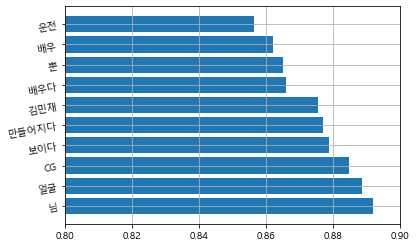

[('님', 0.8919577598571777),
 ('얼굴', 0.8886482119560242),
 ('CG', 0.8847361207008362),
 ('보이다', 0.8788954019546509),
 ('만들어지다', 0.8768910765647888),
 ('김민재', 0.8754621148109436),
 ('배우다', 0.8661050796508789),
 ('뿐', 0.86497962474823),
 ('배우', 0.86210697889328),
 ('운전', 0.856512188911438)]


In [58]:
# 데이터가 400개 있을때는 유사도가 너무 높게 나왔는데,
# 2000개로 늘렸더니 유사도가 조정됐음
showGraph(data1)
pprint(data1)

In [60]:
# showGraph(data2, isPositive=False)
pprint(data2)

[('10', -0.14678925275802612),
 ('점', -0.15265923738479614),
 ('인생', -0.15649181604385376),
 ('번', -0.2011404037475586),
 ('평점', -0.2200586348772049),
 ('영화관', -0.22615109384059906),
 ('소름', -0.2278212159872055),
 ('world', -0.2329719066619873),
 ('처음', -0.23371312022209167),
 ('돈', -0.23477837443351746)]
